# STAT 301 Group Assignment
# 1. Title Page
**Type**: Final Group Project <br>
**Group 42 members**: Anthony Leong, Brian Ni, Shivani Aggarwal, Tina Yu <br> 
**TA**: Yian Lin

# 2. Introduction
## Background and Research Motivation

With the growth of peer-to-peer accommodation platforms, Airbnb has become a dominant player in the short-term rental market across major cities worldwide with over 5 million listings worldwide. The pricing of Airbnb listings varies significantly, driven by numerous listing and location-specific characteristics. There are numerous studies examining this relationship for various reasons:
- **Understanding what factors are associated with the variation in Airbnb prices can help both hosts optimize their listings and travelers make more informed booking decisions.**
- Scholars have argued that the existence of Airbnb listings raise the cost of living for local renters as landlords are switching their property to cater short-term rentals, decreasing supply for long-term renters and driving up the rental rates over time (Barron et al., 2019).
- The growth of Airbnb in neighbours that are not traditionally touristic brings economic growth to these areas, while also disrupting the hotel industry (Deboosere et al., 2019).

This raises the question - *what factors influence the success of Airbnbs and how are their prices determined?*

This is what we aim to study in this project. We will focus on Airbnb listings across 10 popular European cities - Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna. The dataset provides information about the characteristics of Airbnb listings and their prices. The listing prices are attributed to these characteristics such as room types, cleanliness and satisfaction ratings, number of bedrooms, and so on.


## Research Questions
Here is a formal description of the research question we are interested in answering in the report through our analysis.
1. **How is price associated with the different characteristics of an Airbnb listing?**  
   - This question is exploratory and inferential. We are interested in identifying which features (e.g., room type, cleanliness rating, distance to city center) show meaningful associations with listing prices.

2. **Can we predict the price of an Airbnb listing based on its characteristics?**  
   - This question is predictive. We aim to build a model to estimate listing prices from available features, assessing model performance on unseen data.

> Both questions are answerable using the variables in our dataset, and align with the inference and prediction techniques we’ve learned in class.

# 3. Methods and Results
## A) Data
### Airbnb Prices in European Cities
This dataset provides information about Airbnb listings and their prices in 10 popular European cities - Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna. The listing prices are attributed to several characteristics such as room types, cleanliness and satisfaction ratings, number of bedrooms, and so on. Each city has two .csv files - for weekdays and weekends each.

The dataset contains 21 variables as described in the table below: 

| Variable | Description | Type |
| -------- | ----------- | ---- |
|`realSum`| The total price of the Airbnb listing| Numeric|
|`room_type`| The type of room being offered (private, shared, etc.)| Categorical|
|`room_shared`|	Whether the room is shared or not| Boolean|
|`room_private`| Whether the room is private or not| Boolean|
|`person_capacity`|	The maximum number of people that can stay in the room| Numeric|
|`host_is_superhost`|Whether the host is a superhost or not | Boolean|
|`multi`|	Whether the listing is for multiple rooms or not | Boolean|
|`biz`|	Whether the listing is for business purposes or not |Boolean|
|`cleanliness_rating`|	The cleanliness rating of the listing (0-10) |Numeric|
|`guest_satisfaction_overall`|	The overall guest satisfaction rating of the listing (0-100) | Numeric|
|`bedrooms`|	The number of bedrooms in the listing |Numeric|
|`dist`|	The distance from the city centre |Numeric|
|`metro_dist`|	The distance from the nearest metro station |Numeric|
|`atrr_index`| Attraction index determined by the number of reviews at nearby attractions | Numeric|
|`atrr_index_norm`| Normalized attraction index: scale to 100 | Numeric|
|`rest_index`| Restaurant index determined by the number of reviews at nearby restaurants | Numeric|
|`rest_index_norm`| Normalized restaurant index: scale to 100 | Numeric|
|`lng`|	The longitude of the listing |Numeric|
|`lat`|	The latitude of the listing |Numeric|

### Source of Data
This dataset is scraped off of a bigger dataset published in the article ***Determinants of Airbnb prices in European cities:  A spatial econometrics approach*** ([DOI link](https://doi.org/10.1016/j.tourman.2021.104319)) authored by Kristóf Gyódi and Łukasz1 Nawaro and published on January 13, 2021.

The dataset in the article is collected by web-scraping the Airbnb platform to look for accomodations for two people and two nights in 10 major European cities, 4-6 weeks in advance of the travel dates.

### Pre-selection of Variables
For the purpose of this assignment, we will use weekdays and weekends data from only 3 cities - Budapest, London, and Rome. This warrants the relevance of 6 .csv files with different number of observations. Below is a list of the observations in each file.
- `budapest_weekdays.csv`: $2,074$
- `budapest_weekends.csv`: $1,948$
- `london_weekdays.csv`: $4,614$
- `london_weekends.csv`: $5,379$
- `rome_weekdays.csv`: $4,492$
- `rome_weekends.csv`: $4,535$

Since the data is scattered across 6 .csv files, we will read in all of the files and combine them into one dataset, `airbnb`, with all the information. The total number of observations in the combined dataset will be $23,042$. We will do so by adding two columns:
- `city` which stores the values of the cities, and
- `weekend` which stores the value of 1 for weekends and 0 for weekdays.


We will also remove some variables we don't see fit when we conduct our analysis. Below is a detailed description of such variables:
- `X` which is the index value for each listing in each dataset (and it therefore has repetitions across different .csv files)
- `room_shared` and `room_private` since the type of room is already captured by the categorical variable `room_type`
- `lat` and `lng` as the location of the listing will be captured by the new variable `city` and we do not plan to use spatial featuring, maps or clusters for our analysis for which these variables would be useful

The following variables are also somewhat redundant but they still hold theoretical value:
- `attr_index` and `rest_index` as normalized data for attraction and restaurant indices are captured by `attr_index_norm` and `rest_index_norm`. However, later on, we will test to see whether normalized variables are perfectly scaled version of raw variables by checking their VIF scores before implementing model selection methods.

### Reading the data
We read in the data from our public GitHub repository which stores the required .csv files. 

We will add the columns `city` and `weekend` and remove the variable `X` when combining all the .csv files into one dataset named `airbnb`.

In [68]:
# required libraries
library(tidyverse)
library(repr)
library(broom)
library(ggplot2)
library(glmnet)
library(car)
library(MASS)
library(caret)
library(dplyr)

In [2]:
# loading data from public GitHub repo - credit to Shivani
bud_wd_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/budapest_weekdays.csv"
bud_we_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/budapest_weekends.csv"
lon_wd_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/london_weekdays.csv"
lon_we_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/london_weekends.csv"
rom_wd_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/rome_weekdays.csv"
rom_we_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/rome_weekends.csv"

In [3]:
# reading in the .csv files and wrangling them - credit to Shivani
bud_wd <- read.csv(bud_wd_url)
bud_wd <- bud_wd  %>% 
    mutate(city = "Budapest",
          weekend = 0)  

bud_we <- read.csv(bud_we_url)
bud_we <- bud_we  %>% 
    mutate(city = "Budapest",
          weekend = 1)    

lon_wd <- read.csv(lon_wd_url)
lon_wd <- lon_wd  %>% 
    mutate(city = "London",
          weekend = 0) 

lon_we <- read.csv(lon_we_url)
lon_we <- lon_we  %>% 
    mutate(city = "London",
          weekend = 1)  

rom_wd <- read.csv(rom_wd_url)
rom_wd <- rom_wd  %>% 
    mutate(city = "Rome",
          weekend = 0)

rom_we <- read.csv(rom_we_url)
rom_we <- rom_we  %>% 
    mutate(city = "Rome",
          weekend = 1)  

In [4]:
# combining all datasets into one - credit to Shivani
airbnb <- rbind(bud_wd, bud_we, lon_wd, lon_we, rom_wd, rom_we)  %>% 
    dplyr::select(-X)

# visualizing the dataset
head(airbnb, 3)
tail(airbnb, 3)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,⋯,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,238.9905,Entire home/apt,False,False,6,True,0,1,10,99,⋯,0.3593550,0.3526430,404.4047,24.116552,893.4773,67.65685,19.05074,47.50076,Budapest,0
2,300.7943,Entire home/apt,False,False,6,False,0,1,9,98,⋯,0.9294272,0.2002355,1676.8760,100.000000,452.5397,34.26770,19.04493,47.50405,Budapest,0
3,162.3819,Entire home/apt,False,False,4,True,0,0,10,98,⋯,2.4508403,0.2794518,163.5885,9.755551,191.9923,14.53825,19.02170,47.49882,Budapest,0


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,⋯,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
23040,878.5916,Entire home/apt,False,False,6,True,1,0,10,99,⋯,2.759242,1.1953387,759.3691,16.82416,1783.2686,38.85310,12.46900,41.90100,Rome,1
23041,447.2448,Entire home/apt,False,False,4,True,1,0,10,98,⋯,1.641598,0.8588370,1125.8572,24.94387,1687.8958,36.77516,12.48342,41.89634,Rome,1
23042,265.8219,Entire home/apt,False,False,6,False,0,1,10,96,⋯,4.411877,0.3524935,167.7019,3.71551,467.3403,10.18221,12.53000,41.86700,Rome,1


## B) Exploratory Data Analysis (EDA)
### Wrangling the data
We will start by cleaning the code by removing the pre-selected variables which we identified as redundant and useless in our analysis. These are `room_shared`, `room_private`, `lat`, and `lng`.
We will also add a column named `ID` to identify each row with a unique number to split the dataset.

In [5]:
# cleaning dataset - credit to Tina
airbnb_clean <- airbnb %>%
    dplyr::select(-room_shared, -room_private, -lat, -lng) %>%
    mutate(ID = row_number())

head(airbnb_clean, 3)

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,city,weekend,ID
,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,238.9905,Entire home/apt,6,True,0,1,10,99,1,0.3593550,0.3526430,404.4047,24.116552,893.4773,67.65685,Budapest,0,1
2,300.7943,Entire home/apt,6,False,0,1,9,98,2,0.9294272,0.2002355,1676.8760,100.000000,452.5397,34.26770,Budapest,0,2
3,162.3819,Entire home/apt,4,True,0,0,10,98,1,2.4508403,0.2794518,163.5885,9.755551,191.9923,14.53825,Budapest,0,3


### Visualization of Data

<font color = "red"> **(delete this before submitting)** </font> Include 2 effective and creative visualizations 
- explore the association of some potential explanatory variables with the response (use colours, point types, point size and/or faceting to include more variables)
- highlight potential problems (e.g., multicollinearity or outliers) 

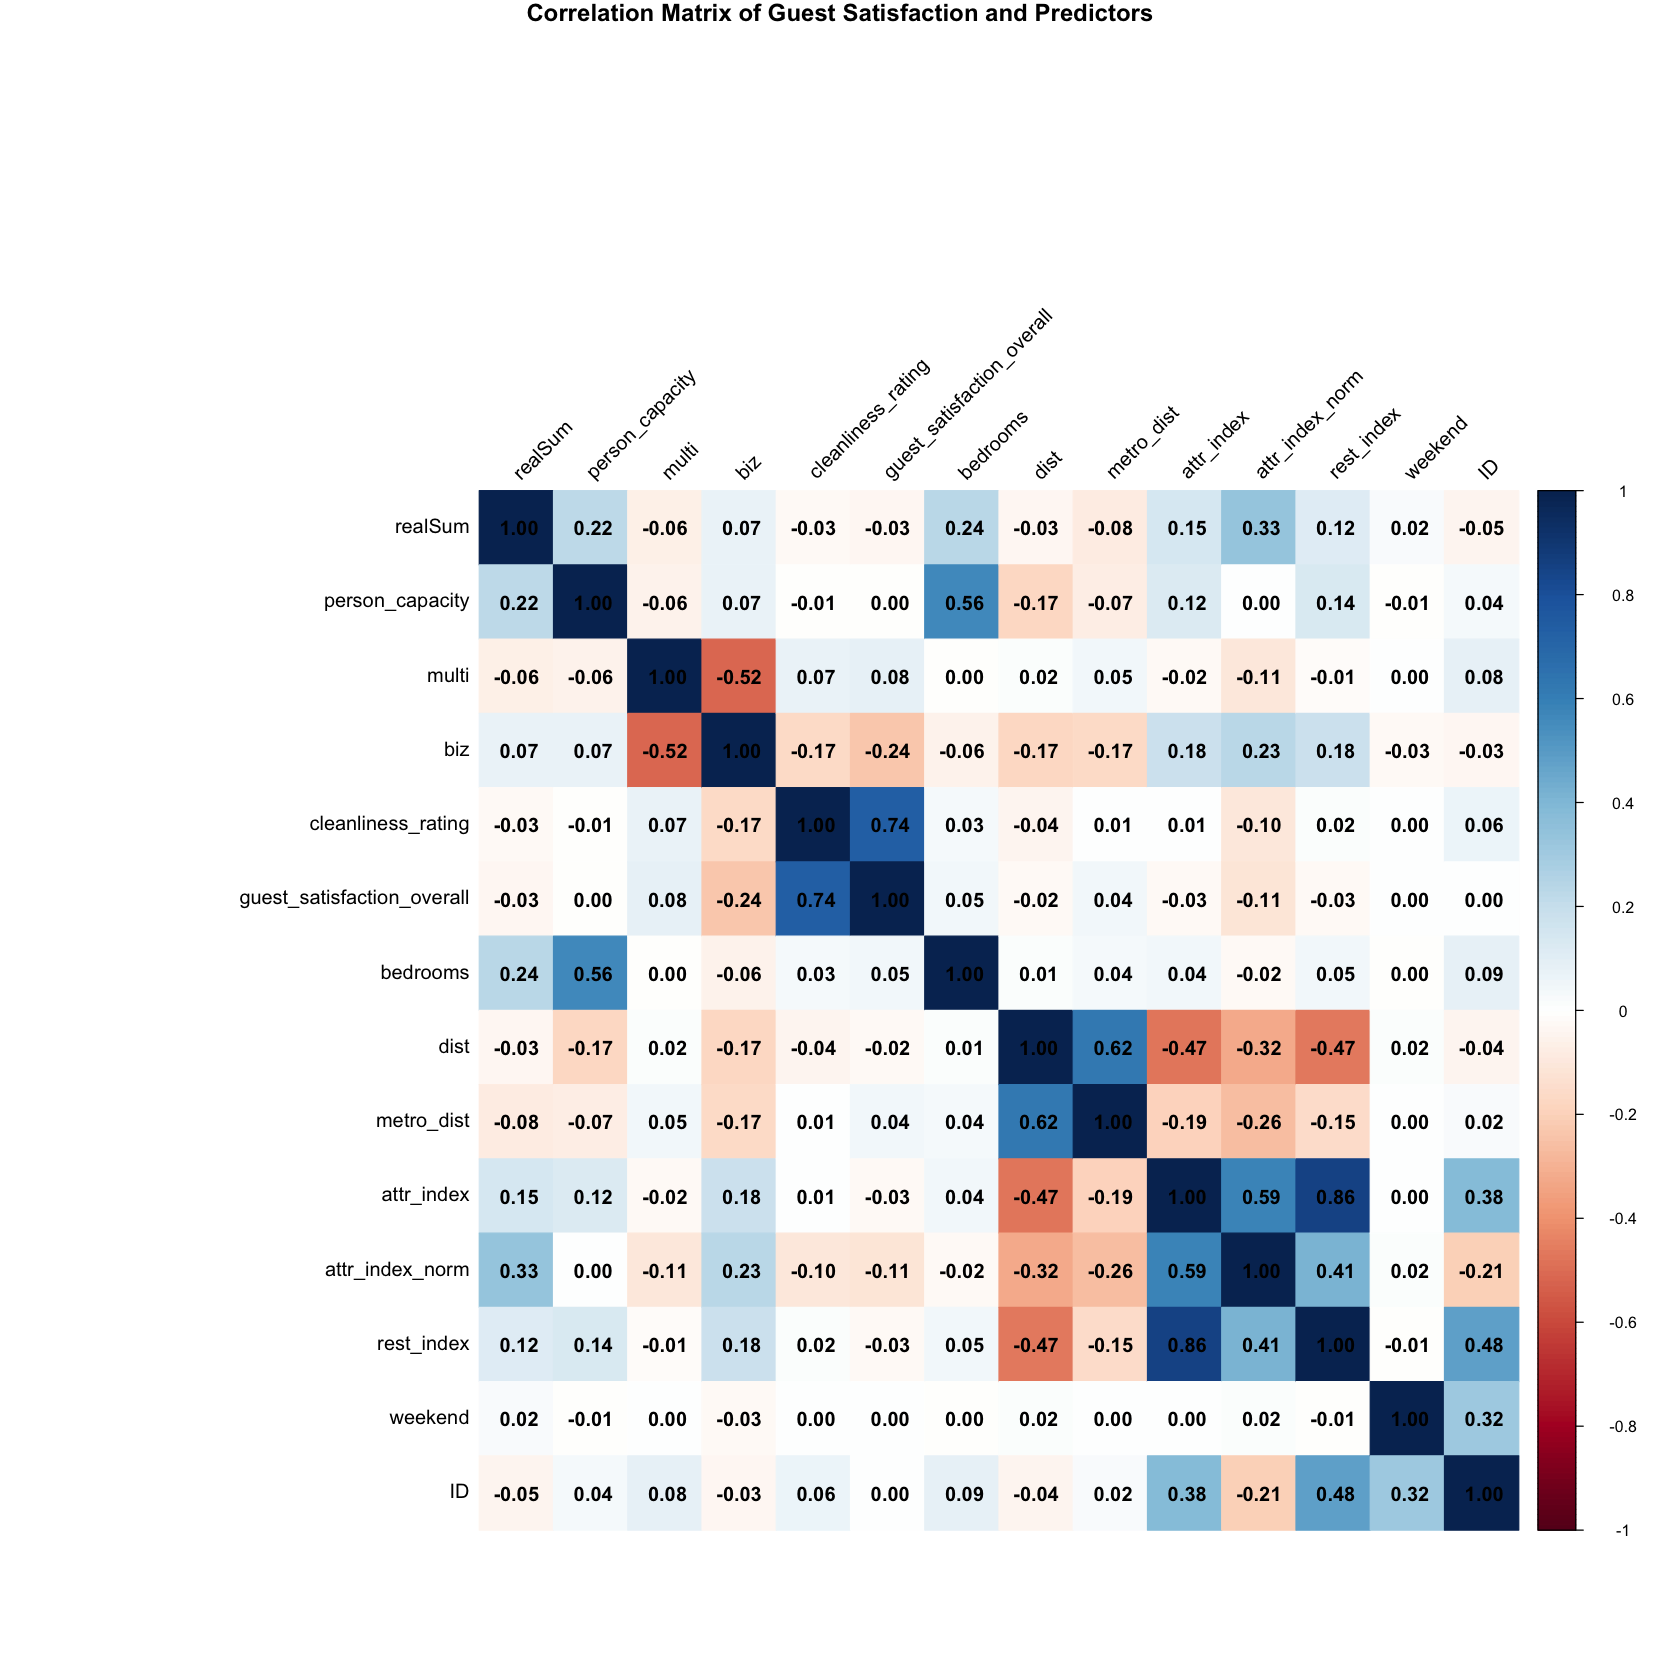

In [33]:
options(repr.plot.width=14, repr.plot.height=14)
selected_vars <- airbnb_clean[, c('realSum','person_capacity', 'multi', 'biz', 'cleanliness_rating','guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index','attr_index_norm', 'rest_index', 'weekend', 'ID')]

cor_mat <- cor(selected_vars, use = "complete.obs")

corrplot(cor_mat, method = "color", addCoef.col = "black", 
         tl.col = "black", tl.srt = 45,
         title = "Correlation Matrix of Guest Satisfaction and Predictors", 
         mar = c(0,0,1,0))



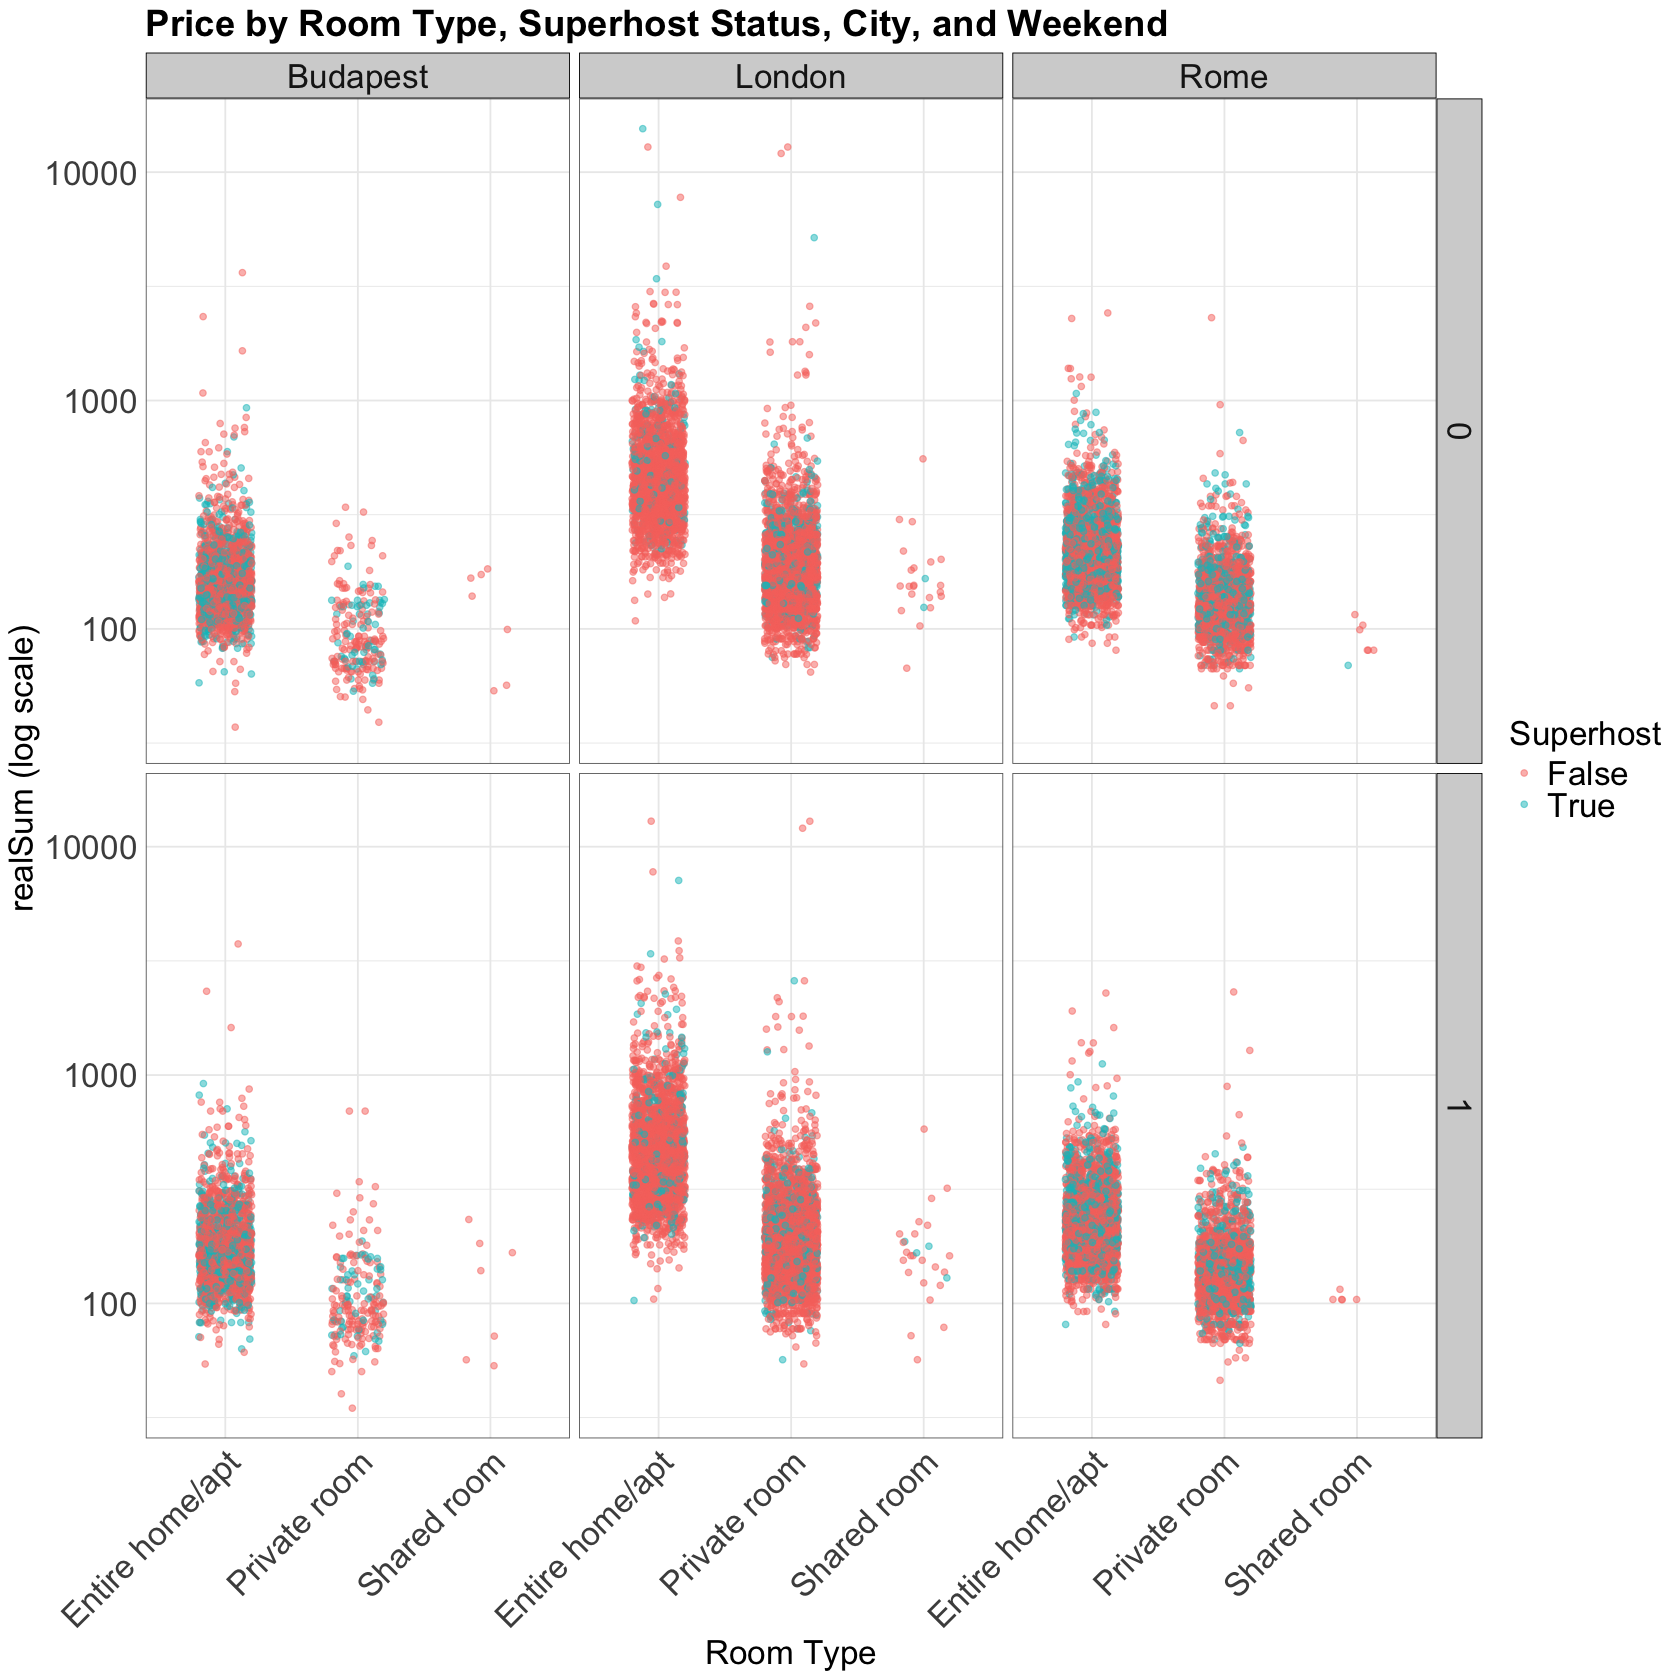

In [60]:
options(repr.plot.width=14, repr.plot.height=14)
ggplot(airbnb_clean, aes(x = room_type, y = realSum, color = host_is_superhost)) +
  geom_jitter(width = 0.2, alpha = 0.5) +
  scale_y_log10() +
  facet_grid(weekend ~ city) +
  labs(
    title = "Price by Room Type, Superhost Status, City, and Weekend",
    x = "Room Type", y = "realSum (log scale)",
    color = "Superhost"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 22, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    strip.text = element_text(size = 20),
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 20),
    strip.background = element_rect(fill = "lightgray", color = "black", linewidth = 0.5),
    panel.border = element_rect(color = "gray40", fill = NA, linewidth = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

#### Interpretation of visualizations

We used a correlation matrix and a color-coded jitter plot with facet grid to explore the relationships between the numerical as well as categorical predictors and the independent variable realSum. 

The correlation matrix shows several pairs of variables with moderately strong multicollinearity, namely
- bedrooms and person_capacity
- biz and multi
- metro_dist and dist
- guest_satisfaction_overall and cleanliness_rating
- attr_index and rest_index
- attr_index and attr_index_norm

Additionally, we noted that the correlation between predictors and realSum are generally weak, but the three most significant are bedrooms, attr_index_norm, and person_capacity.

The jitter plot reveals some notable patterns for the categorical variables:
- room_type clearly influences price, where Entire Home type rooms are much higher in price than private rooms, followed by shared rooms
- there is an apparent difference in prices between different cities
- there is not an apparent difference in prices between weekday/weekends
- there is not an apparent difference in prices when the host is a superhost
- we may need to deal with outliers


All in all, these findings from the visualizations give us a good understanding of the data which can help us plan the necessary next steps. With the presence of multicollinearity, it is necessary for us to conduct further analysis to remove the redundant variables. The jitter plot suggests categorical variables may also be helpful predictors.

### Summary Tables
<font color = "red"> **(delete before submitting)** </font>
Any summary tables that are relevant to your analysis (e.g., summarize number of observation in groups, indicate if NAs exist) - we can do total observations per city, number of NAs, maybe highest and lowest and mean prices in each city

Be sure not to print output that takes up a lot of screen space!
Your EDA must be comprehensive with high quality plots.

In [62]:
print(colSums(is.na(airbnb_clean)))

                   realSum                  room_type 
                         0                          0 
           person_capacity          host_is_superhost 
                         0                          0 
                     multi                        biz 
                         0                          0 
        cleanliness_rating guest_satisfaction_overall 
                         0                          0 
                  bedrooms                       dist 
                         0                          0 
                metro_dist                 attr_index 
                         0                          0 
           attr_index_norm                 rest_index 
                         0                          0 
           rest_index_norm                       city 
                         0                          0 
                   weekend                         ID 
                         0                          0 


In [64]:
vif <- vif(lm(realSum ~., data = airbnb_clean))
vif

,GVIF,Df,GVIF^(1/(2*Df))
room_type,1.681403,2,1.138723
person_capacity,2.170560,1,1.473282
host_is_superhost,1.149091,1,1.071957
multi,1.438180,1,1.199242
biz,1.602667,1,1.265965
cleanliness_rating,2.257238,1,1.502411
guest_satisfaction_overall,2.337984,1,1.529047
bedrooms,1.568879,1,1.252549
dist,4.652703,1,2.157013
metro_dist,1.928631,1,1.388751


In [69]:
airbnb_clean %>%
  group_by(city) %>%
  summarise(
    min_price = min(realSum, na.rm = TRUE),
    max_price = max(realSum, na.rm = TRUE),
    mean_price = mean(realSum, na.rm = TRUE)
  ) %>%
  arrange(desc(mean_price))

city,min_price,max_price,mean_price
<chr>,<dbl>,<dbl>,<dbl>
London,54.32865,15499.894,362.4693
Rome,46.05709,2418.348,205.3919
Budapest,34.77934,3751.234,176.5135


## C) Methods Plan
To address our research questions,
> **How is price associated with the different characteristics of an Airbnb listing and can we predict them?**

we propose to use **Multi-variable Least Squares Regression** framework focussed on prediction. 

This will help us quantify the relationship between our quantitative response variable `realSum` and the explanatory variables, while creating a model with strong out-of-sample predictability. To improve model interpretability and reduce potential overfitting, we will compare multiple model selection methods and choose the model that will give us the ***lowest Root Mean Squared Error (RMSE)***. RMSE is well-suited to test prediction accuracy as it directly measures the average magnitude of prediction errors in the same units as the response variable. The model selection methods we will test are:
- Backward stepwise selection using AIC
- LASSO (L1 regularization), and
- Ridge (L1 regularization)

We choose backward stepwise selection method over forward selection as we believe that most of the variables in our dataset are relevant predictors and starting with a full model will help us retain these important predictors that might otherwise be missed in forward selection process.

Additionally, we will **split the data into three subsets** and use 60% of the rows to train the model selection methods, 20% of the rows to fit the reduced model and validate the resulting RMSE, and finally the remaining 20% to fit our selected model to test its predictive power. This will help us avoid the post-inference problem we could potentially run into while selecting variables and fitting the model on the same data. 

We will also test the selected variables from the *best* model for multicollinearity using the VIF test to remove any remaining multicollinear variables and avoid inflated standard errors caused by linear dependence between predictors.

### Assumptions in the Model
In order to use the ordinary least square regression, we first have to make the following assumptions:

- **Linearity**: The relationship between the response and explanatory variable is linear.
- **Independence**: The residual errors are independent of each other since we have a random sample. 
- **Homoscedasticity**: The variance of residuals is constant across all levels of the explanatory variables.
- **Normality**: The conditional distribution of error is normal. This also reinstates the linearity assumption that the conditional expectation of the response is linear.
- **Non-multicollinearity**: There is no perfect correlation between two or more explanatory variables. We will also test for this assumption through a VIF test.

### Splitting dataset
Now we will slice the dataset into a 60-20-20 splits, named `airbnb_training`, `airbnb_validation`, and `airbnb_testing` respectively. We will also remove the variable `ID` from these subsets as it is not relevant for our regression.

In [8]:
# splitting data into three sets - one for training, one for validation, one for testing - credit to Anthony
set.seed(9999)

airbnb_training <- slice_sample(airbnb_clean, prop = 0.6)   # 60% of the data
airbnb_remaining <- anti_join(airbnb_clean, airbnb_training, by = "ID")
airbnb_validation <- slice_sample(airbnb_remaining, prop = 0.5)   # 20% of the data
airbnb_testing <- anti_join(airbnb_remaining, airbnb_validation, by = "ID")   # 20% of the data

# dropping ID
airbnb_training <- dplyr::select(airbnb_training, -ID)
airbnb_validation <- dplyr::select(airbnb_validation, -ID)
airbnb_testing <- dplyr::select(airbnb_testing, -ID)

head(airbnb_training, 3)

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,city,weekend
,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,115.9482,Private room,2,False,0,0,9,96,1,5.709598,1.181127,197.9007,13.75685,440.1913,7.878657,London,1
2,161.5505,Entire home/apt,4,False,0,0,10,95,2,5.550061,0.864905,138.0221,3.05794,381.7032,8.316387,Rome,1
3,262.7061,Private room,4,False,0,0,9,85,1,6.458999,1.407879,198.1813,13.77636,381.8880,6.835130,London,1


### Testing for Scaled versions of Existing Variables
We identified earlier that the normalized variables, `attr_index_norm` and `rest_index_norm`, may be perfectly scaled versions of their raw counterparts, `attr_index` and `rest_index`. If that is the case, it would violate our non-multicollinearity assumption, which requires that no explanatory variable be a perfect linear combination of others. Including both versions in the model would lead to redundancy and inflated standard errors. 

We will test for multicollinearity using the Variance Inflation Factor (VIF) scores to determine whether to keep the raw or normalized variables in our final regression model.

In [9]:
# checking multicollinearity - credit to Anthony
options(repr.matrix.max.rows = 18)

# vif scores with all variables
pre_vif <- vif(lm(realSum ~., data = airbnb_training))
pre_vif

,GVIF,Df,GVIF^(1/(2*Df))
room_type,1.688956,2,1.139999
person_capacity,2.153756,1,1.467568
host_is_superhost,1.155365,1,1.074879
multi,1.433745,1,1.197391
biz,1.592306,1,1.261866
cleanliness_rating,2.256942,1,1.502312
guest_satisfaction_overall,2.336237,1,1.528475
bedrooms,1.552735,1,1.246088
dist,4.764003,1,2.182660
metro_dist,1.923162,1,1.386781


We will focus on the **GVIF^(1/(2*Df))** column to decide the variable selection process as our dataset contains multiple categorical variables. We can see that `attr_index` has a higher score than `attr_index_norm` and `rest_index` has a higher score than `rest_index_norm`. Therefore, we will remove the raw variables `attr_index` and `rest_index`.  

In [10]:
# removing raw variables as they have higher VIF scores than normalized variables - credit to Anthony
airbnb_training <- dplyr::select(airbnb_training, -c(attr_index, rest_index))
airbnb_validation <- dplyr::select(airbnb_validation, -c(attr_index, rest_index))
airbnb_testing <- dplyr::select(airbnb_testing, -c(attr_index, rest_index))

# vif scores without raw variables
post_vif <- vif(lm(realSum ~., data = airbnb_training))
post_vif

,GVIF,Df,GVIF^(1/(2*Df))
room_type,1.682548,2,1.138916
person_capacity,2.153721,1,1.467556
host_is_superhost,1.154421,1,1.074440
multi,1.433691,1,1.197368
biz,1.589253,1,1.260656
cleanliness_rating,2.256536,1,1.502177
guest_satisfaction_overall,2.335724,1,1.528307
bedrooms,1.552669,1,1.246061
dist,4.610271,1,2.147154
metro_dist,1.888696,1,1.374298


### Training Model Selection Methods
We will use `airbnb_training` to train our model selection methods. 

For the backward stepwise selection method, we define the null model - which assumes that the best predictor of `realSum` is its average - and the full model - which assumes that it's best predicted by all the variables. The method will start with the full model and iteratively remove variables based on their contribution to the model’s performance measured by AIC. 

To prepare for regularization techniques, on the other hand, we convert the training data into a matrix form so it can be properly utilized by the techniques.

In [11]:
# full and null models, and training matrix - credit to Anthony
null_model <- lm(realSum ~ 1, data = airbnb_training)
full_model <- lm(realSum ~ ., data = airbnb_training)
training_matrix <- model.matrix(object = realSum ~ ., data = airbnb_training)[, -1]

In [12]:
# stepwise training - credit to Anthony
n <- nrow(airbnb_training)
stepwise_model <- stepAIC(full_model,
                          direction = "backward",
                          scope = list(lower = null_model, upper = full_model),
                          k = log(n), trace = 0)
summary(stepwise_model)


Call:
lm(formula = realSum ~ room_type + person_capacity + bedrooms + 
    metro_dist + attr_index_norm + rest_index_norm + city, data = airbnb_training)

Residuals:
    Min      1Q  Median      3Q     Max 
 -792.5   -87.0   -21.5    52.3 14381.6 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -53.1468    15.0138  -3.540 0.000402 ***
room_typePrivate room -126.1750     7.5484 -16.715  < 2e-16 ***
room_typeShared room  -171.8360    52.5426  -3.270 0.001077 ** 
person_capacity         18.1128     3.2296   5.608 2.08e-08 ***
bedrooms               104.9495     6.0998  17.205  < 2e-16 ***
metro_dist             -12.0428     3.1909  -3.774 0.000161 ***
attr_index_norm          9.1613     0.4444  20.617  < 2e-16 ***
rest_index_norm         -1.3377     0.3143  -4.256 2.10e-05 ***
cityLondon             160.7517    13.4252  11.974  < 2e-16 ***
cityRome                64.9518     8.9351   7.269 3.81e-13 ***
---
Signif. codes:  0 '***' 0.00

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s1
(Intercept)                -132.0242246
room_typePrivate room      -122.7676012
room_typeShared room       -154.9426967
person_capacity              18.4810079
host_is_superhostTrue        -7.4699179
multi                         .        
biz                           .        
cleanliness_rating            0.9649431
guest_satisfaction_overall    0.7715510
bedrooms                    103.2857589
dist                          .        
metro_dist                  -11.4493809
attr_index_norm               9.1438159
rest_index_norm              -1.3010340
cityLondon                  155.3431521
cityRome                     58.7946663
weekend                       7.1001938

[1] "The lambda related to the minimum MSE in the LASSO model is 0.8548"

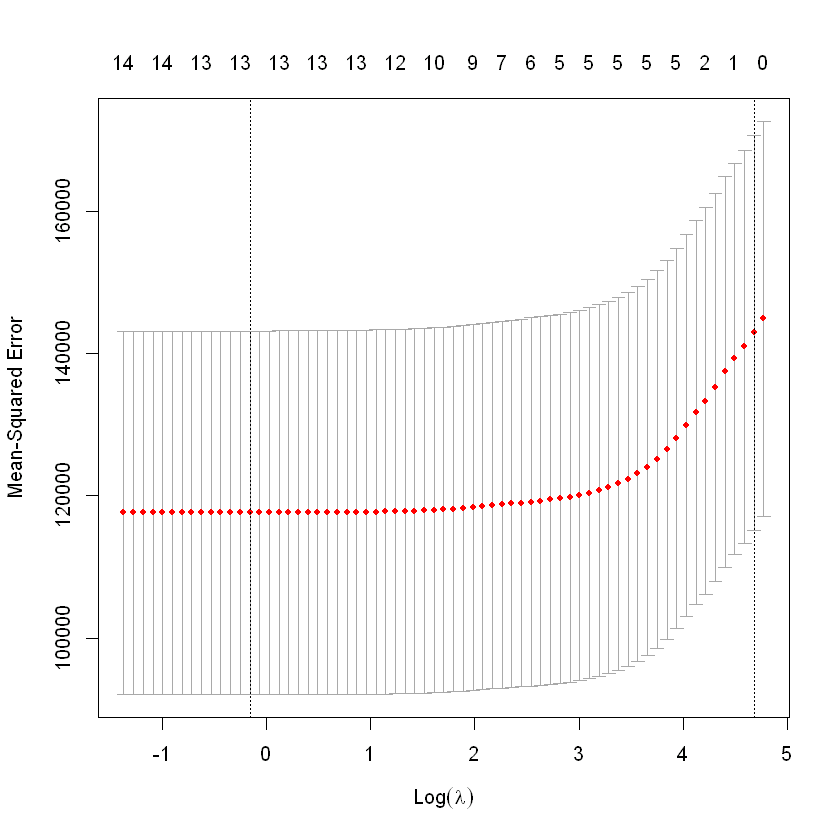

In [13]:
# LASSO training - credit to Anthony
lasso_model <- cv.glmnet(x = training_matrix, y = airbnb_training$realSum, alpha = 1)
coef(lasso_model, s = "lambda.min")
plot(lasso_model)
sprintf("The lambda related to the minimum MSE in the LASSO model is %.4f", lasso_model$lambda.min)

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s1
(Intercept)                -136.3404254
room_typePrivate room      -118.2070324
room_typeShared room       -163.8599904
person_capacity              19.9317661
host_is_superhostTrue       -10.3792555
multi                        -1.7986375
biz                          -0.2052225
cleanliness_rating            1.9381975
guest_satisfaction_overall    0.7792359
bedrooms                    100.5885161
dist                          0.2474648
metro_dist                  -12.5034415
attr_index_norm               9.0320341
rest_index_norm              -1.3579503
cityLondon                  147.6247581
cityRome                     53.4419201
weekend                       8.8503011

[1] "The lambda related to the minimum MSE in the Ridge model is 11.8374"

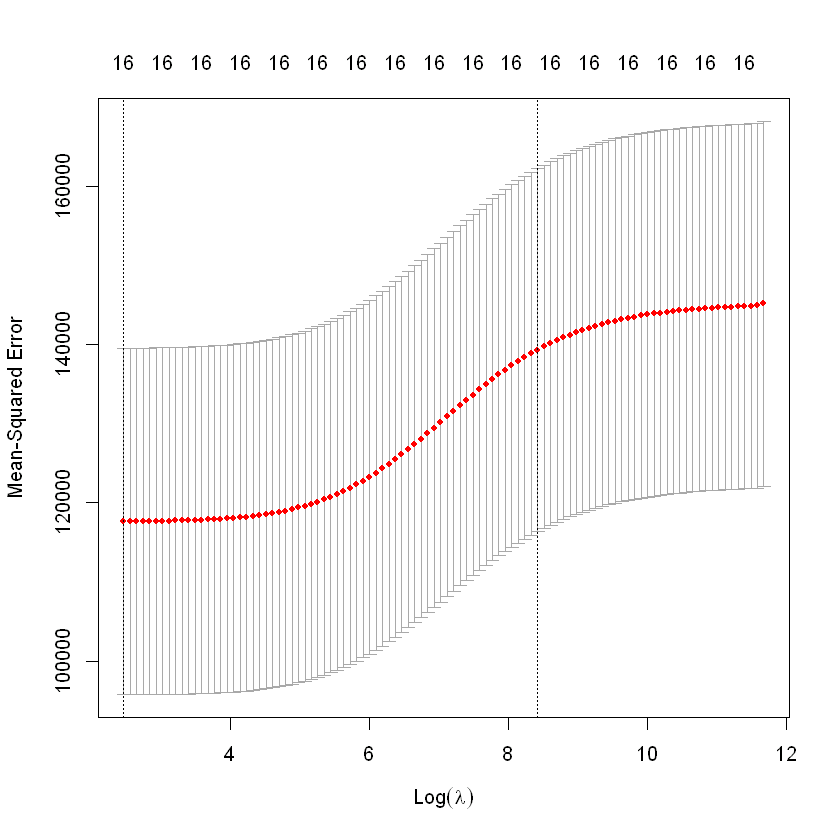

In [14]:
# ridge training - credit to Anthony
ridge_model <- cv.glmnet(x = training_matrix, y = airbnb_training$realSum, alpha = 0)
coef(ridge_model, s = "lambda.min")
plot(ridge_model)
sprintf("The lambda related to the minimum MSE in the Ridge model is %.4f", ridge_model$lambda.min)

### Validating Model Selection Methods
We will use `airbnb_validation` to test the trained models and choose the best one which has the lowest RMSE.

In [15]:
# validation - credit to Anthony
validation_matrix <- model.matrix(object = realSum ~ ., data = airbnb_validation)[, -1]
stepwise_preds <- predict(stepwise_model, newdata = airbnb_validation)
lasso_preds <- predict(lasso_model, newx = validation_matrix, s = "lambda.min")
ridge_preds <- predict(ridge_model, newx = validation_matrix, s = "lambda.min")

validation_rmse <- tibble(
    Model = c("Multiple Linear Regression with Stepwise Selection", "LASSO Regression with Minimum MSE", "Ridge Regression with Minimum MSE"),
    RMSE = c(RMSE(stepwise_preds, airbnb_validation$realSum),
             RMSE(lasso_preds, airbnb_validation$realSum),
             RMSE(ridge_preds, airbnb_validation$realSum))
)

validation_rmse

Model,RMSE
<chr>,<dbl>
Multiple Linear Regression with Stepwise Selection,197.2752
LASSO Regression with Minimum MSE,197.1093
Ridge Regression with Minimum MSE,196.9571


### Model Selection
After evaluating the performance of three regression models on the validation set using RMSE, we find that while all models performed similarly, Ridge regression achieved the lowest RMSE (196.96), followed closely by LASSO (197.11) and Stepwise Linear Regression (197.28). This suggests that Ridge regularization slightly improved predictive accuracy.

Since Ridge regression utilizes all variables in the dataset and assigns coefficients to predictors such that multicollinearity is minimized, we won't need to test the VIF scores.

### Fitting the Ridge Model on Testing Data
Now that we've selected the Ridge model, we will fit it on testing data and evaluate its performance.

In [16]:
# preparing testing data in matrix format
test_matrix <- model.matrix(realSum ~ ., data = airbnb_testing)[, -1]

# fitting ridge model on testing data
ridge_test_preds <- predict(ridge_model, newx = test_matrix, s = "lambda.min")

In [17]:
# evaluating performance of the ridge model
ridge_test_rmse <- RMSE(ridge_test_preds, airbnb_testing$realSum)
ridge_test_rmse

[1] 198.2848

In [18]:
# visualizing ridge coefficients again
coef(ridge_model, s = "lambda.min")

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s1
(Intercept)                -136.3404254
room_typePrivate room      -118.2070324
room_typeShared room       -163.8599904
person_capacity              19.9317661
host_is_superhostTrue       -10.3792555
multi                        -1.7986375
biz                          -0.2052225
cleanliness_rating            1.9381975
guest_satisfaction_overall    0.7792359
bedrooms                    100.5885161
dist                          0.2474648
metro_dist                  -12.5034415
attr_index_norm               9.0320341
rest_index_norm              -1.3579503
cityLondon                  147.6247581
cityRome                     53.4419201
weekend                       8.8503011

# 4. Discussion
<font color = "red"> **(delete before submitting)** </font>
In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.

Summarize what you found and the implications/impact of your findings
If relevant, discuss whether your results were what you expected to find
Discuss how your model could be improved
Discuss future questions/research this study could lead to

# 5. References
Barron, K., Kung, E., & Proserpio, D. (2019). *When Airbnb Listings in a City Increase, So Do Rent Prices.* Harvard Business Review. https://ci.carmel.ca.us/sites/main/files/file-attachments/harvard_business_article_and_study.pdf

Deboosere, R., Kerrigan, D. J., Wachsmuth, D., & El-Geneidy, A. (2019). *Location, location and professionalization: a multilevel hedonic analysis of Airbnb listing prices and revenue.* Regional Studies, Regional Science, 6(1), 143–156. https://doi.org/10.1080/21681376.2019.1592699

Gyódi, K., & Nawaro Ł. (2021). *Determinants of Airbnb prices in European cities: A spatial econometrics approach*. https://doi.org/10.1016/j.tourman.2021.104319